In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

### Data loading and pre-processing

In [2]:
Data = pd.read_csv('SalesData.csv')

In [3]:
Data = Data.drop('Unnamed: 0', axis =1)
Data['Profit'] = (Data['SellPrice'] - Data['COGS']) * Data['SellQty'] 
Data['TransactionDate'] = pd.to_datetime(Data['TransactionDate'])

Wall time: 1.29 s


In [4]:
Data['TransNo'] = Data['TransNo'].astype(str)
Data['CustomerNo'] = Data['CustomerNo'].astype(str)
Data['SubCategory'] = Data['SubCategory'].astype(str)

In [127]:
#Dropping transaction lines with less than 0 Selling Price and negative SellQty
Data = Data[(Data.SellPrice > 0) & (Data.SellQty >= 0)]

### Data Overview

In [128]:
Data.shape

(2156625, 11)

In [129]:
Data.head()

,TransNo,TransLine,CustomerNo,Category,SubCategory,TransactionDate,SellPrice,SellQty,COGS,Part,Profit
0,4515542,4,80000,CAT3002,430,2015-01-02,25.01,0.0,19.899,P140PA780,0.000
1,4516499,3,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
2,4516508,3,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
3,4516509,4,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
4,4517969,10,32965,CAT3002,430,2015-01-06,23.28,2.0,19.899,P140PA780,6.762


In [82]:
Data.dtypes

TransNo                    object
TransLine                   int64
CustomerNo                 object
Category                   object
SubCategory                object
TransactionDate    datetime64[ns]
SellPrice                 float64
SellQty                   float64
COGS                      float64
Part                       object
Profit                    float64
dtype: object

In [158]:
#unique values in each column
def unique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ":", count)

unique_counts(Data)

TransNo : 321754
TransLine : 894
CustomerNo : 1305
Category : 14
SubCategory : 295
TransactionDate : 890
SellPrice : 31340
SellQty : 575
COGS : 30587
Part : 42295
Profit : 193552


In [130]:
Data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,TransLine,SellPrice,SellQty,COGS,Profit
count,2.15662e+06,2.15662e+06,2.15662e+06,2.15662e+06,2.15662e+06
mean,20.4193,27.4894,13.2433,19.1082,24.5527
std,30.6311,74.7268,109.626,55.5466,112.807
min,1,0.01,0,-0.1,-9434
25%,3,2.87,1,1.591,2.7
50%,11,7.74,2,4.75,8.592
75%,25,27.09,8,18.77,23
max,894,12000,20000,9580.87,27750


In [132]:
Data['TransactionDate'].max() - Data['TransactionDate'].min() 

Timedelta('1021 days 00:00:00')

## Time Series Analysis

In [169]:
Data['TransactionDate'].dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

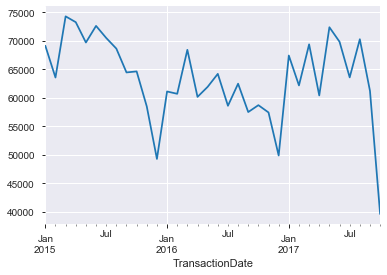

In [192]:
Data.groupby([Data['TransactionDate'].dt.to_period('M')]).size().plot()

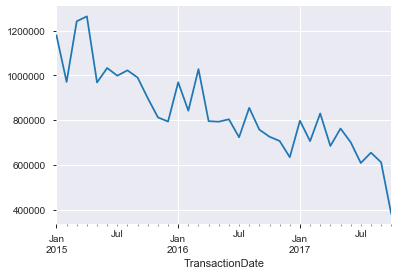

In [194]:
Data.groupby([Data['TransactionDate'].dt.to_period('M')])['SellQty'].sum().plot()

The above graph shows we are selling lesser products but the profit is increasing in the last year. That could mean, we are focusing on higher profit products.

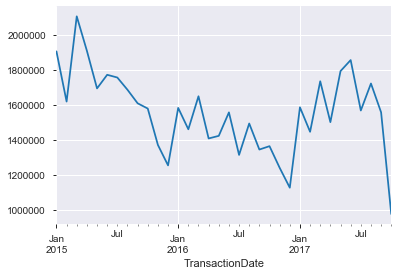

In [188]:
Data.groupby([Data['TransactionDate'].dt.to_period('M')])['Profit'].sum().plot()

## Customer related analysis

#### RFM Analysis

In [35]:
Data.head()

,TransNo,TransLine,CustomerNo,Category,SubCategory,TransactionDate,SellPrice,SellQty,COGS,Part,Profit
0,4515542,4,80000,CAT3002,430,2015-01-02,25.01,0.0,19.899,P140PA780,0.000
1,4516499,3,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
2,4516508,3,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
3,4516509,4,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
4,4517969,10,32965,CAT3002,430,2015-01-06,23.28,2.0,19.899,P140PA780,6.762


In [59]:
pd.DataFrame({
    'LastVisit' : Data.groupby('CustomerNo')['TransactionDate'].max(),
    'TotalVisits' : Data.groupby(['CustomerNo'])['TransNo'].nunique(), 
    'TotalItemsBought' : Data.groupby(['CustomerNo']).size(),
    'TotalProfit' : Data.groupby(['CustomerNo'])['Profit'].sum()
    })

,LastVisit,TotalVisits,TotalItemsBought,TotalProfit
CustomerNo,,,,
10000,2017-06-30,17,291,7239.690
10012,2017-08-08,10,12,1288.732
10028,2017-09-18,73,312,4656.900
10051,2017-10-05,150,1392,34220.119
100581,2017-10-18,226,720,49102.481
...,...,...,...,...
93277,2017-10-16,39,252,22563.425
9405,2017-09-01,15,20,1879.221
94081,2016-11-14,2,19,-22.148


### Clustering customers based on Profit
And do what with it?

### Churn, customers who are inactive

## Df for Transaction wise analysis

## Product wise analysis
Which Products/categories are most profitable?

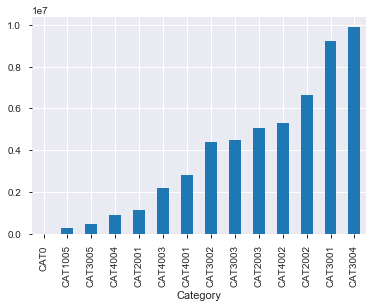

In [205]:
Data.groupby(['Category'])['Profit'].sum().sort_values().plot.bar()

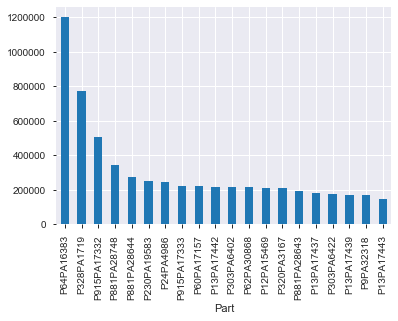

In [210]:
Data.groupby(['Part'])['Profit'].sum().sort_values(ascending=False).head(20).plot.bar()

### Free Samples made them buy the product over other customers?
Calculate precision/recall for those products.

In [73]:
Data[Data.SellQty == 0]['Part']

0            P140PA780
5            P140PA780
8            P140PA780
84           P140PA780
111          P140PA780
              ...     
2200731    P555PA40964
2200779    P555PA40994
2200908    P555PA41082
2200991    P555PA41142
2201089    P555PA41222
Name: Part, Length: 167625, dtype: object

## Recommendations based on Apriori

In [211]:
Data.head()

,TransNo,TransLine,CustomerNo,Category,SubCategory,TransactionDate,SellPrice,SellQty,COGS,Part,Profit
0,4515542,4,80000,CAT3002,430,2015-01-02,25.01,0.0,19.899,P140PA780,0.000
1,4516499,3,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
2,4516508,3,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
3,4516509,4,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
4,4517969,10,32965,CAT3002,430,2015-01-06,23.28,2.0,19.899,P140PA780,6.762


In [228]:
Data.groupby(['Part'])['Profit'].sum().sort_values(ascending=False).head(10000).index

Index(['P64PA16383', 'P328PA1719', 'P915PA17332', 'P881PA28748', 'P881PA28644',
       'P230PA19583', 'P24PA4986', 'P915PA17333', 'P60PA17157', 'P13PA17442',
       ...
       'P470PA39674', 'P290PA30123', 'P2420PA5881', 'P320PA1738',
       'P4250PA29614', 'P2446PA26516', 'P562PA35612', 'P219PA29808',
       'P510PA1605', 'P2700PA20270'],
      dtype='object', name='Part', length=10000)

In [230]:
temp_df = Data[Data.Part.isin(Data.groupby(['Part'])['Profit'].sum().sort_values(ascending=False).head(1000).index)
              ].groupby(['TransNo', 'Part'])['SellQty'].sum().unstack().reset_index().fillna(0).set_index('TransNo')

In [231]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [232]:
Apr_df = temp_df.applymap(hot_encode)
del temp_df

In [227]:
Apr_df

Part
TransNo


In [ ]:
%%time
# Building the model 
frq_items = apriori(Apr_df, min_support = 0.1, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

### Which products are returned frequently?

**- Decided to drop these records**

In [146]:
#Data[Data.SellQty < 0]['Part'].value_counts()
Data.shape

(2156625, 11)

In [154]:
Data[Data.SellQty == 0].Category.unique().shape

(13,)

In [144]:
Data[(Data['Part'].isin(Data[Data.SellQty == 0].Part))& (Data['CustomerNo'].isin(Data[Data.SellQty == 0].CustomerNo))]

,TransNo,TransLine,CustomerNo,Category,SubCategory,TransactionDate,SellPrice,SellQty,COGS,Part,Profit
0,4515542,4,80000,CAT3002,430,2015-01-02,25.01,0.0,19.899,P140PA780,0.000
1,4516499,3,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
2,4516508,3,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
3,4516509,4,80000,CAT3002,430,2015-01-05,25.01,1.0,20.295,P140PA780,4.715
4,4517969,10,32965,CAT3002,430,2015-01-06,23.28,2.0,19.899,P140PA780,6.762
...,...,...,...,...,...,...,...,...,...,...,...
2200909,5241866,1,22057,CAT1005,606,2017-05-10,1150.00,1.0,659.980,P555PA41082,490.020
2200991,5266287,1,22057,CAT1005,606,2017-06-06,800.00,0.0,650.000,P555PA41142,0.000
2200992,5267814,1,22057,CAT1005,606,2017-06-07,800.00,1.0,650.000,P555PA41142,150.000
2201089,5209592,2,25570,CAT1005,606,2017-04-07,87.09,0.0,87.090,P555PA41222,0.000


In [121]:
Data[(Data.CustomerNo == '33253')&(Data.Part == 'P915PA17332')]['SellQty'].sum()#.sort_values('TransactionDate')

-681.0

In [115]:
Data[Data.Part == 'P915PA17332']

,TransNo,TransLine,CustomerNo,Category,SubCategory,TransactionDate,SellPrice,SellQty,COGS,Part,Profit
1039281,4517014,2,56432,CAT3003,533,2015-01-05,25.0,33.0,12.5,P915PA17332,412.5
1039282,4517945,2,56432,CAT3003,533,2015-01-06,25.0,50.0,12.5,P915PA17332,625.0
1039283,4516577,5,55178,CAT3003,533,2015-01-05,25.0,-100.0,12.5,P915PA17332,-1250.0
1039284,4520322,6,56432,CAT3003,533,2015-01-08,25.0,46.0,12.5,P915PA17332,575.0
1039285,4520308,6,56432,CAT3003,533,2015-01-08,25.0,58.0,12.5,P915PA17332,725.0
...,...,...,...,...,...,...,...,...,...,...,...
1041210,5392366,1,43755,CAT3003,533,2017-10-13,12.5,-250.0,12.5,P915PA17332,-0.0
1041211,5393417,15,33253,CAT3003,533,2017-10-16,25.0,-4.0,12.5,P915PA17332,-50.0
1041212,5393417,10,33253,CAT3003,533,2017-10-16,25.0,-5.0,12.5,P915PA17332,-62.5
1041213,5352343,2,43755,CAT3003,533,2017-09-05,12.5,0.0,12.5,P915PA17332,0.0
